# Double (and more) pendulum simulations: Lagrangian

* Make a notebook that solves the double pendulum using (11.37) and 
(11.38) in Taylor Section 11.4 (i.e., do not assume the small angle 
approximation). Implement the pendulum code as a Python class (as in our 
examples). You can use either the Euler-Lagrange or Hamiltonian 
equations. The basic output will be plots of the two angles as a function of 
time for given initial conditions. 

* Show that the system is chaotic for initial conditions beyond the small 
angle approximation. 

* Add Markdown/LaTeX documentation.

* Extend your simulation to three pendulums. 

* Add widgets to control the simulation and/or animate it.

* Last revised 29-April-2022 by Yuanhao Shi (shi.1222@osu.edu).

## The Double Pendulum

Consider a double pendulum, comprising a mass $m_1$ suspende by a massless rod of length $L_1$ from a fixed pivot, and a second mass $m_2$ suspended by a massless rod of length $L_2$ from $m_1$, as shown in Figure 11.9.

![Simplified_level_sheme](DoublePendulum.jpg)

### The total potential and kinetic energies are:
$\begin{align}
 U(\phi_1,\phi_2) = (m_1 + m_2)gL_1(1 - \cos\phi_1) + m_2gL_2(1 - \cos\phi_2)\\
 (11.37)\\
 \quad\Longrightarrow\quad U = \frac12(m_1 + m_2)gL_1\phi_1^2 + \frac12 m_2gL_2\phi_2^2\\
 (11.40)\\
 T = \frac12 (m_1 + m_2)L_1^2 \dot\phi_1^2 - m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1 - \phi_2) + \frac12 m_2L_2^2 \dot\phi_2^2\\
 (11.38)\\
 \quad\Longrightarrow\quad T = \frac12 (m_1 + m_2)L_1^2 \dot\phi_1^2 + m_2L_1L_2\dot\phi_1\dot\phi_2 + \frac12 m_2L_2^2\dot\phi_2^2\\
 (11.39)
\end{align}$
### Substitute the approximate expressions (11.39) and (11.40) for T and U into the Lagrangian: 
$\begin{align}
\mathcal{L} = T - U
\end{align}$

## Euler-Lagrange equation

For the double pendulum pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 (m_1 + m_2)L_1^2 \dot\phi_1^2 + m_2L_1L_2\dot\phi_1\dot\phi_2 + \frac12 m_2L_2^2\dot\phi_2^2 - 
  \frac12(m_1 + m_2)gL_1\phi_1^2 + \frac12 m_2gL_2\phi_2^2
\end{align}$


The Euler-Lagrange equation is 

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_i} = \frac{\partial\mathcal L}{\partial\phi_i}\\
\\
\end{align}$

The two Lagrange equations of mostion $\phi_1$ and $\phi_2$ are: 

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad
 (m_1 + m_2)L_1^2\ddot\phi_1 + m_2L_1L_2\ddot\phi_2 = -(m_1 + m_2)gL_1\phi_1
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad
 m_2L_1L_2\ddot\phi_1 + m_2L_2^2\ddot\phi_2 = -m_2gL_2\phi_2
\end{align}$


 


In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [2]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [3]:
class DoublePendulum():
    """
    LagrangianDoublePendulum class implements the parameters and Lagrange's equations for 
     a double pendulum with no driving or damping.
     
    Parameters
    ----------
    L1 : float, length of the simple pendulum
    L2 : float, length of the simple pendulum
    m1 : float, mass of the first pdendulum
    m2 : float, mass of the secon pdendulum
    g : float, gravitational acceleration at the earth's surface
    ----------
    
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    -------
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt, d^2phi_1/dt^2, dphi_2/dt, d^2phi_2/dt^2]
        
        Parameters
        ----------
        t : float, time 
        y : float, 4-component vector with y[0] = phi_1, y[1] = phi_1_dot,
                                           y[2] = phi_2, y[3] = phi_2_dot.
        ----------
        
        Returns
        -------
        
        """
        phi1, z1, phi2, z2 = y
        c, s = np.cos(phi1 - phi2), np.sin(phi1 - phi2)
        denom = (self.m1 + self.m2 * s**2)                          
        
        phi1_dot = z1
        z1_dot = ( self.m2 * self.g * np.sin(phi2) * c\
                   - self.m2 * s * (self.L1 * z1**2. * c + self.L2 * z2**2.)\
                   - (self.m1 + self.m2) * self.g * np.sin(phi1))\
                   / self.L1 / denom
        
        phi2_dot = z2
        z2_dot = ( (self.m1 + self.m2) * (self.L1 * z1**2. * s\
                   - self.g * np.sin(phi2) + self.g * np.sin(phi1) * c)
                   + self.m2 * self.L2 * z2**2.* s * c)\
                  / self.L2 / denom
        
        return phi1_dot, z1_dot, phi2_dot, z2_dot

    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, abserr=1.0e-10, relerr=1.0e-10):
        '''
        Solves the ODE given initial conditions.
        '''
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot
    def calc_L(y):
        '''
        Returns the total energy of the system.
        '''
        phi1, phi1_dot, phi2, phi2_dot = y.T
        
        # total potential energy
        U = (m1 + m2) * g * L1 * (1. - np.cos(phi1))\
                + m2 * g * L2 * (1. - np.cos(phi2))
        # total kinetic energy
        T = 0.5 * (m1 + m2) * L1**2. * phi1_dot**2.\
            + m2 * L1 * L2 * phi1_dot * phi2_dot * np.cos(phi1 - phi2)\
            + 0.5 * m2 * L2**2. * phi2_dot**2.
        return T - U

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make double pendulum plots 

In [6]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate a double pendulum 
p1 = DoublePendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)

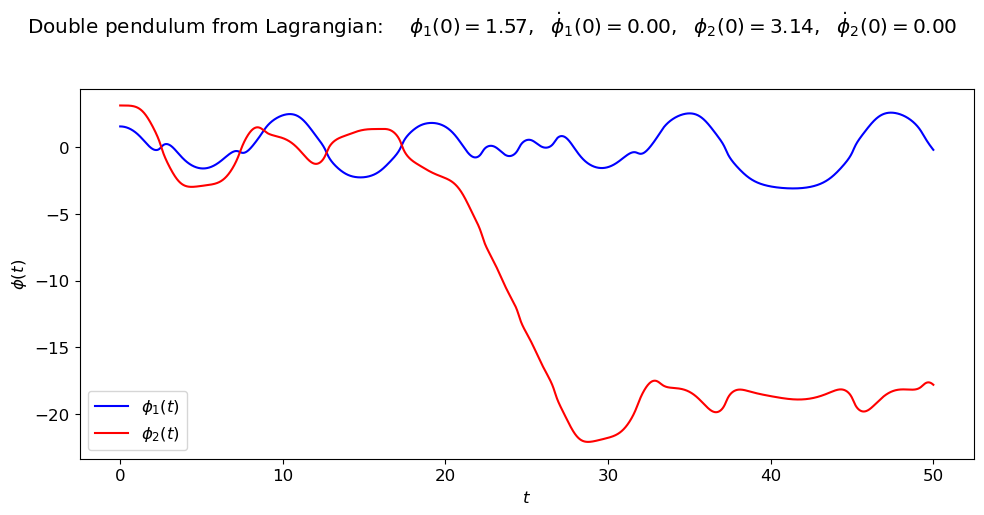

In [7]:
# Set initial conditions
phi1_0 = np.pi / 2.
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.

# Solve the initial conditions
phi1, phi1_dot, phi2, phi2_dot = \
    p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# Start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi1_0:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf'  $\phi_2(0) = {phi2_0:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi2_dot_0:.2f}$' 
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)      
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels = phi_vs_time_labels, 
            color = 'blue',
            label = r'$\phi_1(t)$', 
            ax = ax_a)  
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels = phi_vs_time_labels, 
            color = 'red',
            label = r'$\phi_2(t)$',  
            ax=ax_a)  
fig.tight_layout()
fig.savefig('Double_pendulum_from_Lagrangian(1).png', bbox_inches='tight')

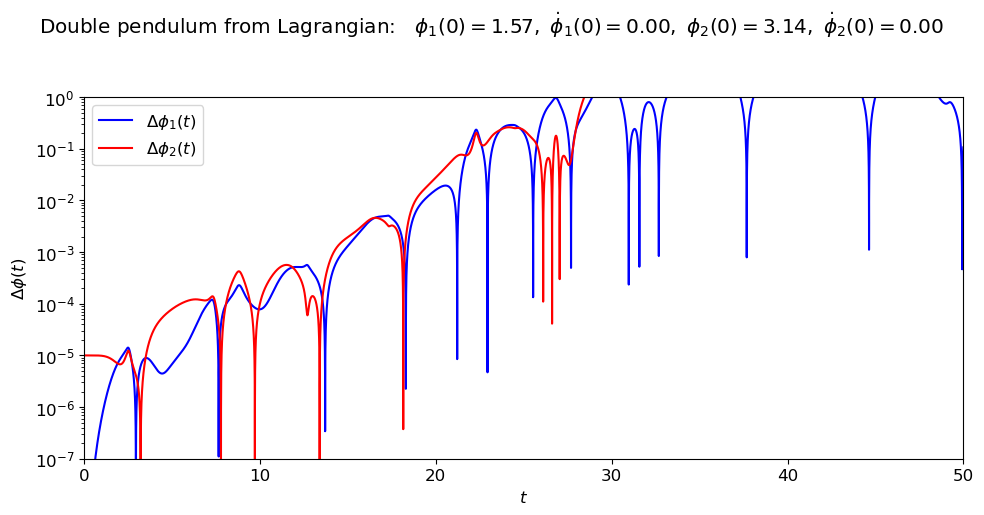

In [8]:
phi1_0 = np.pi / 2.
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = \
      p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)
phi1b, phi1b_dot, phi2b, phi2b_dot = \
      p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0-0.00001, phi2_dot_0)


# Labels for individual plot axes
delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')

# Start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f}$' 
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], abs(phi1[start : stop] - phi1b[start : stop]), 
            axis_labels=delta_phi_vs_time_labels, 
            color='blue',
            semilogy=True, # make it a semilog plot
            label=r'$\Delta\phi_1(t)$',  
            ax=ax_a)  
plot_y_vs_x(t_pts[start : stop], abs(phi2[start : stop] - phi2b[start : stop]), 
            axis_labels=delta_phi_vs_time_labels, 
            color='red', 
            semilogy=True,
            label=r'$\Delta\phi_2(t)$', 
            ax=ax_a) 

ax_a.set_ylim(1.e-7, 1.)
ax_a.set_xlim(0., 50.)

fig.tight_layout()
fig.savefig('Double_pendulum_from_Lagrangian(2).png', bbox_inches='tight')

In [9]:
from matplotlib import animation,rc
from IPython.display import HTML

In [10]:
#def x_y_coords(x0, y0, theta, L):
    